In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
HIMYM = pd.read_csv("HIMYM.txt")
office = pd.read_csv("the_office.txt")
mod_fam = pd.read_csv("modern_family.txt")
that_show = pd.read_csv("70s_show.txt")
sunny = pd.read_csv("sunny.txt")
sunny

,Trend,Season,Episode,Title,Year,Total Votes,Average Rating
0,5,1,1,The Gang Gets Racist,2005,3000,8.3
1,4,1,2,Charlie Wants an Abortion,2005,2677,8.4
2,4,1,3,Underage Drinking: A National Concern,2005,2649,8.4
3,5,1,4,Charlie Has Cancer,2005,2417,8.2
4,5,1,5,Gun Fever,2005,2299,8.1
...,...,...,...,...,...,...,...
148,6,14,6,The Janitor Always Mops Twice,2019,1423,8.6
149,2,14,7,The Gang Solves Global Warming,2019,1032,8.3
150,3,14,8,Paddy's Has a Jumper,2019,1033,8.7
151,3,14,9,A Woman's Right to Chop,2019,919,8.2


In [3]:
def gen_graph(data, output_file, graph_name, output_bool):
    
    seasons = data.iloc[:,1].unique()
    
    season_averages = []
    for x in seasons:
        current_season = data[data.iloc[:,1] == x]
        season_averages.append(current_season.iloc[:,6].mean())
        
    return_frame = pd.DataFrame()
    return_frame["Season"] = seasons
    return_frame["Average Score"] = season_averages
    
    dims = (20,10)
    fig, ax = plt.subplots(figsize = dims)
    plt.ylim(5, 10)
    plt.title(graph_name)
    sns.regplot(data=return_frame, x = "Season", y = "Average Score", lowess = True)
    
    if output_bool:
        fig.savefig(output_file)

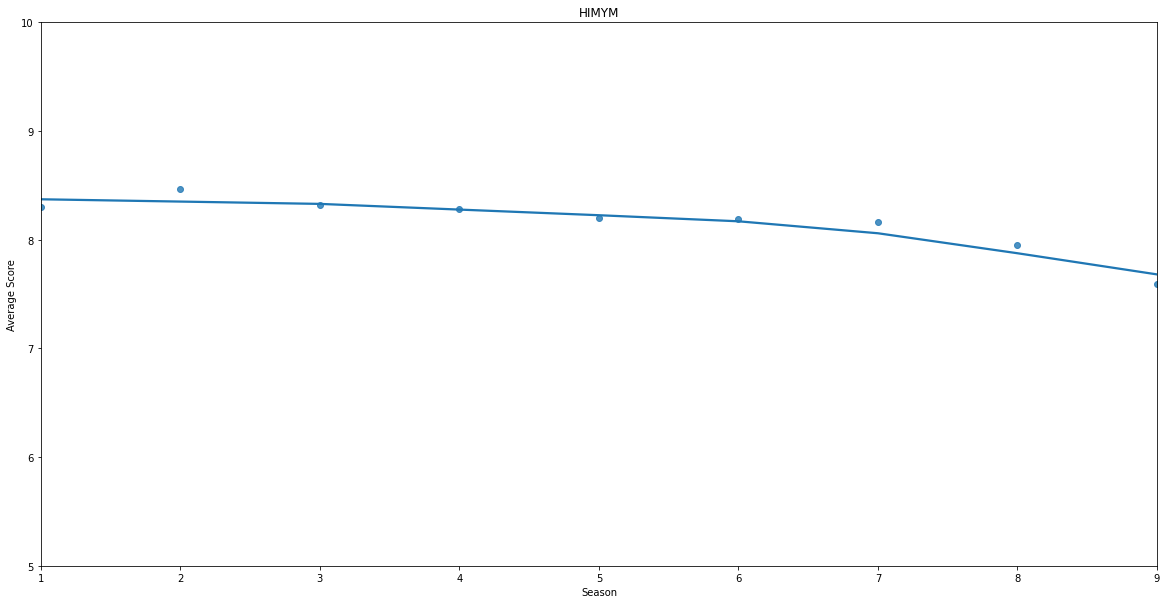

In [4]:
gen_graph(HIMYM, "HIMYM.jpg", "HIMYM", True)

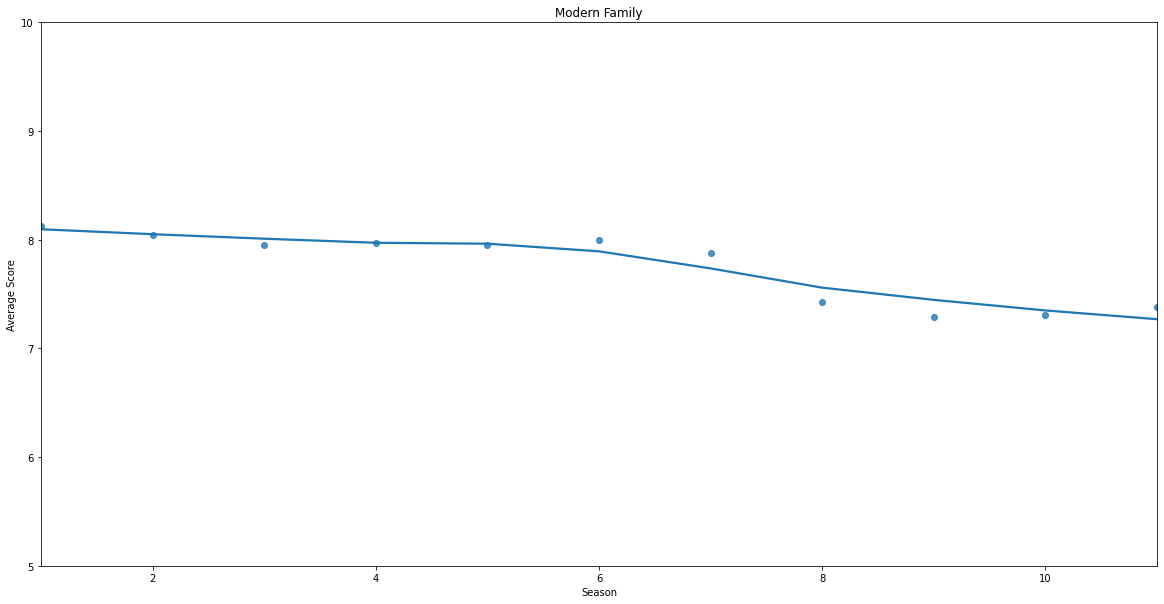

In [5]:
gen_graph(mod_fam, "mod_fam.jpg", "Modern Family", True)

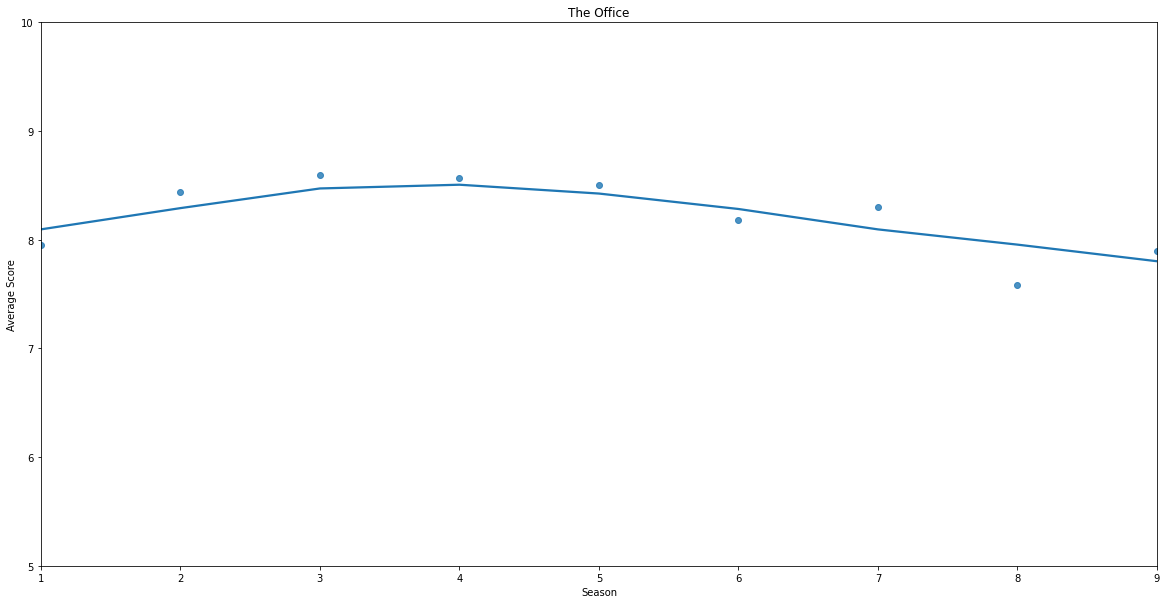

In [6]:
gen_graph(office, "office.jpg", "The Office", True)

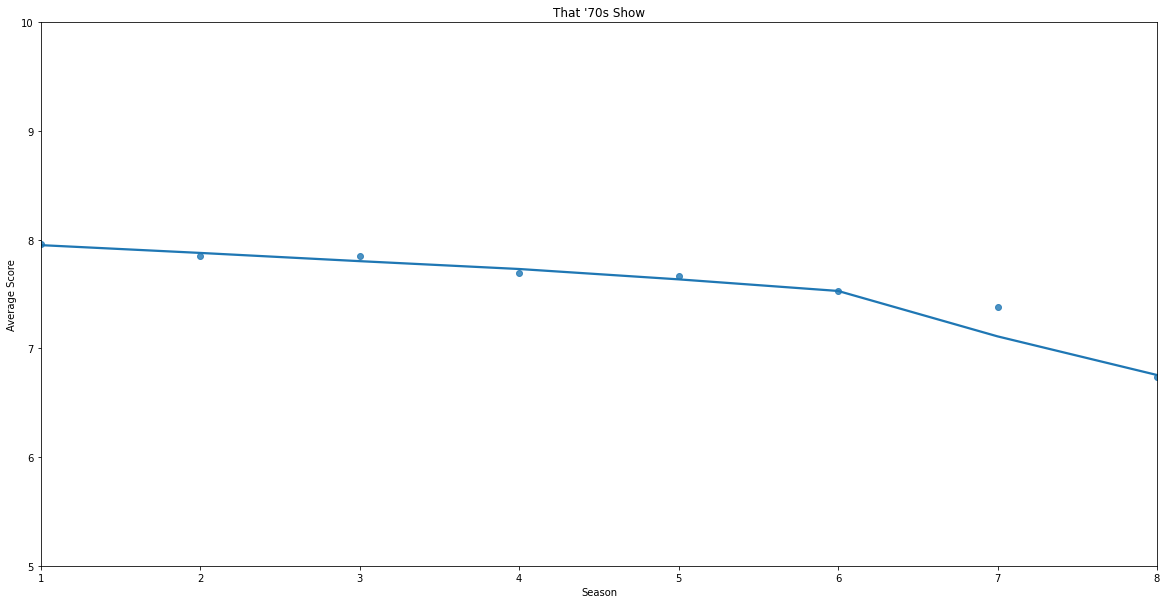

In [7]:
gen_graph(that_show, "that_show.jpg", "That '70s Show", True)

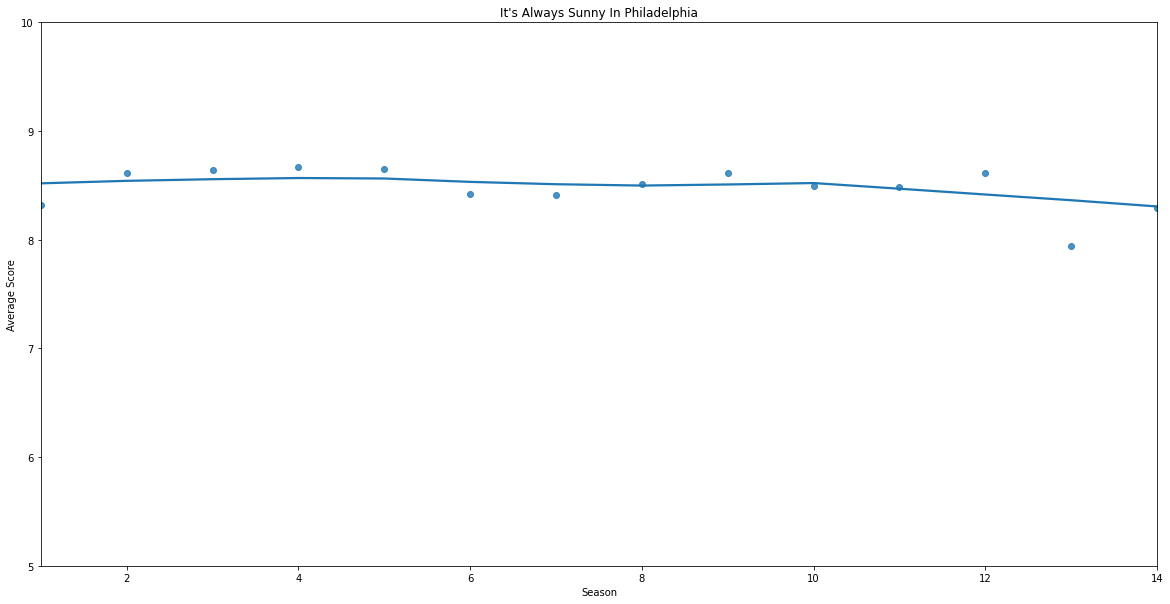

In [8]:
gen_graph(sunny, "sunny.jpg", "It's Always Sunny In Philadelphia", True)

In [9]:
def gen_graph_data(data):
    
    seasons = data.iloc[:,1].unique()
    
    season_averages = []
    for x in seasons:
        current_season = data[data.iloc[:,1] == x]
        season_averages.append(current_season.iloc[:,6].mean())
        
    return_frame = pd.DataFrame()
    return_frame["Season"] = seasons
    return_frame["Average Score"] = season_averages
    
    return return_frame

In [10]:
sunny = gen_graph_data(sunny)
HIMYM = gen_graph_data(HIMYM)
office = gen_graph_data(office)
mod_fam = gen_graph_data(mod_fam)
that_show = gen_graph_data(that_show)

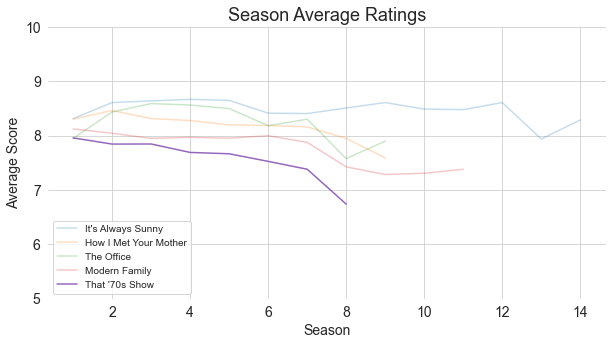

In [15]:
dims = (10,5)
fig, ax = plt.subplots(figsize = dims)
plt.ylim(5, 10)
font_size = 14
plt.title("Season Average Ratings", size = 18)
alpha = .25

# sns.regplot(data=sunny, x = "Season", y = "Average Score", lowess = True, label = "It's Always Sunny")
# sns.regplot(data=HIMYM, x = "Season", y = "Average Score", lowess = True, label = "How I Met Your Mother")
# sns.regplot(data=office, x = "Season", y = "Average Score", lowess = True, label = "The Office")
# sns.regplot(data=mod_fam, x = "Season", y = "Average Score", lowess = True, label = "Modern Family")
# sns.regplot(data=that_show, x = "Season", y = "Average Score", lowess = True, label = "That '70s Show")

sns.lineplot(data=sunny, x = "Season", y = "Average Score", label = "It's Always Sunny", linestyle='--', alpha = alpha)
sns.lineplot(data=HIMYM, x = "Season", y = "Average Score", label = "How I Met Your Mother", linestyle='--', alpha = alpha)
sns.lineplot(data=office, x = "Season", y = "Average Score", label = "The Office", linestyle='--', alpha = alpha)
sns.lineplot(data=mod_fam, x = "Season", y = "Average Score", label = "Modern Family", linestyle='--', alpha = alpha)

sns.lineplot(data=that_show, x = "Season", y = "Average Score", label = "That '70s Show")

plt.xticks(size = font_size)
plt.yticks(size = font_size)

plt.xlabel("Season", size = font_size)
plt.ylabel("Average Score", size = font_size)

sns.despine(left = True, bottom = True)

#sns.set_style("whitegrid")

fig.savefig("Show trajectories.jpg")

In [45]:
sns.style?

Object `sns.style` not found.
